In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
#Loading DataSets

players = pd.read_csv("DataSets/Player_Stats.csv")
teams = pd.read_csv("DataSets/Team_Stats.csv")
matches = pd.read_csv("DataSets/Match_Results.csv")

players.head(), teams.head(), matches.head()

(   player_id     player_name team  matches  runs  average  strike_rate  \
 0          1     Virat Kohli  RCB       14   639    53.25        139.8   
 1          2    Rohit Sharma   MI       14   417    29.78        134.5   
 2          3        KL Rahul  LSG       14   616    51.33        142.3   
 3          4        MS Dhoni  CSK       14   332    41.50        135.0   
 4          5  Jasprit Bumrah   MI       14    15     7.50         85.0   
 
    wickets  
 0        0  
 1        0  
 2        0  
 3        0  
 4       20  ,
   team  matches_played  wins  losses  avg_runs_scored  avg_runs_conceded
 0  RCB              14     7       7            168.5              170.2
 1   MI              14     8       6            172.3              168.0
 2  CSK              14     9       5            175.8              165.4
 3   GT              14    10       4            178.1              162.2
 4  LSG              14     8       6            170.0              169.5,
    match_id team1

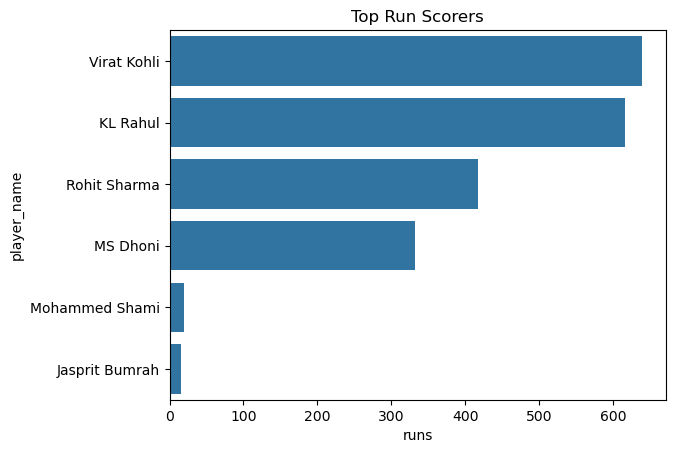

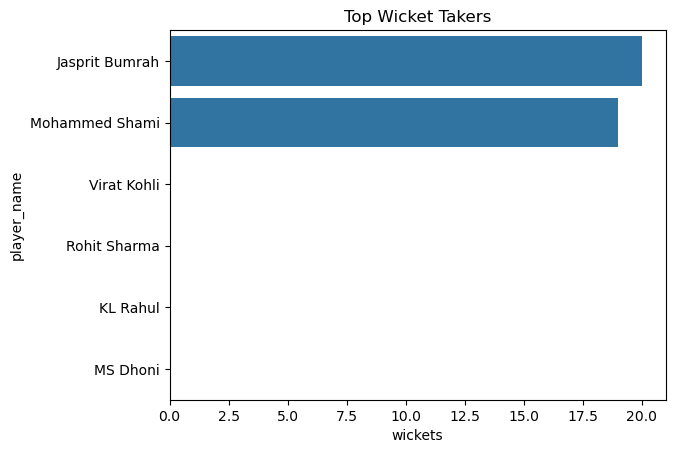

In [11]:
#Player Performance Analysis

# Top run scorers
top_batsmen = players.sort_values(by="runs", ascending=False)

plt.figure()
sns.barplot(x="runs", y="player_name", data=top_batsmen)
plt.title("Top Run Scorers")
plt.show()

# Top wicket takers
top_bowlers = players.sort_values(by="wickets", ascending=False)

plt.figure()
sns.barplot(x="wickets", y="player_name", data=top_bowlers)
plt.title("Top Wicket Takers")
plt.show()



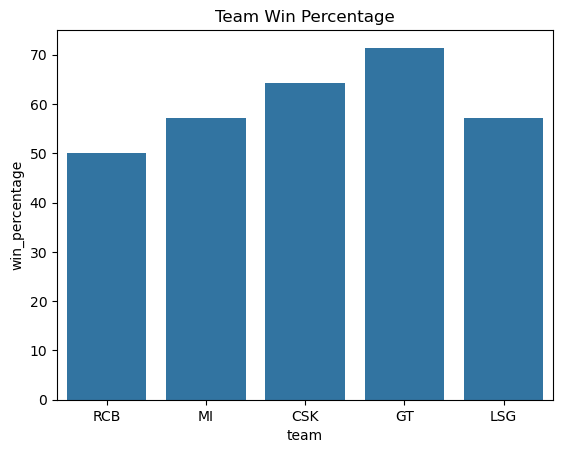

In [12]:
#Team Statistics Analysis

# Win percentage
teams["win_percentage"] = (teams["wins"] / teams["matches_played"]) * 100

plt.figure()
sns.barplot(x="team", y="win_percentage", data=teams)
plt.title("Team Win Percentage")
plt.show()


In [15]:
#Match Outcome Feature Engineering 

# Create target variable
matches["team1_win"] = np.where(matches["winner"] == matches["team1"], 1, 0)

# Encode categorical variables
encoder = LabelEncoder()
matches["team1"] = encoder.fit_transform(matches["team1"])
matches["team2"] = encoder.fit_transform(matches["team2"])
matches["venue"] = encoder.fit_transform(matches["venue"])


In [24]:
#Prepare Data For ML 

X = matches[["team1", "team2", "team1_score", "team2_score", "venue"]]
y = matches["team1_win"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [29]:
# =========================
# 1. Import libraries
# =========================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# =========================
# 2. Load dataset
# =========================
matches = pd.read_csv("DataSets/Match_Results.csv")

# =========================
# 3. Create target variable
# =========================
matches["team1_win"] = (matches["winner"] == matches["team1"]).astype(int)


# =========================
# 4. Encode categorical columns
# =========================
for col in ["team1", "team2", "venue"]:
    matches[col] = LabelEncoder().fit_transform(matches[col])


# =========================
# 5. Select features and target
# =========================
X = matches[[
    "team1",
    "team2",
    "team1_score",
    "team2_score",
    "venue"
]]

y = matches["team1_win"]


# =========================
# 6. Handle missing values
# =========================
X = X.fillna(0)


# =========================
# 7. Train-test split (FIXED LINE)
# ❌ NO stratify (dataset too small)
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=42
)


# =========================
# 8. Train Logistic Regression
# =========================
model = LogisticRegression(
    solver="liblinear",
    max_iter=1000
)

model.fit(X_train, y_train)


# =========================
# 9. Predict & evaluate
# =========================
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [30]:
#Insights

# Feature importance
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
})

importance.sort_values(by="Importance", ascending=False)


,Feature,Importance
2,team1_score,0.520164
4,venue,-0.038629
0,team1,-0.170279
1,team2,-0.196667
3,team2_score,-0.507823
